# **Importing the necessary libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

plt.style.use('ggplot')

#**Logistic Regression** - 
It is used for classification problems, problems with binary answers like,
If you want to classify an email as either as spam or not spam,
If you want to classify a cancer tumor as benign or malignant.

In this dataset we want to classify whether a room is occupied (1) or not (0)



1.   Hypothesis function-
The hypothesis function gives us the probability that the output is 1. Here, the hypothesis function is a function of the sigmoid function. Also, the hypothesis equation lies between 0 and 1. Based on the value produced by the hypothesis function we can decide to which class an output belongs to. Sigmoid function is taken as the hypothesis function

 We set a decision boundary to classify the outputs that we get.
The decision boundary is the line that separates the area where y = 0 and where y = 1. It gets created by our hypothesis function. 
  Here, the decision boundary is taken as 0.5.

2. Error/ Cost function- We use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0. 
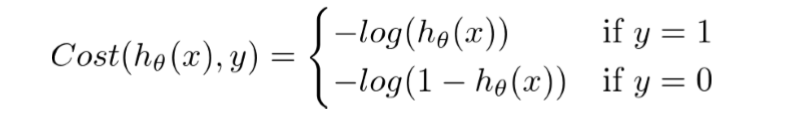



Since the output states can vary depending on the value of y, we combine the two separate cost function. The combined cost function used here is
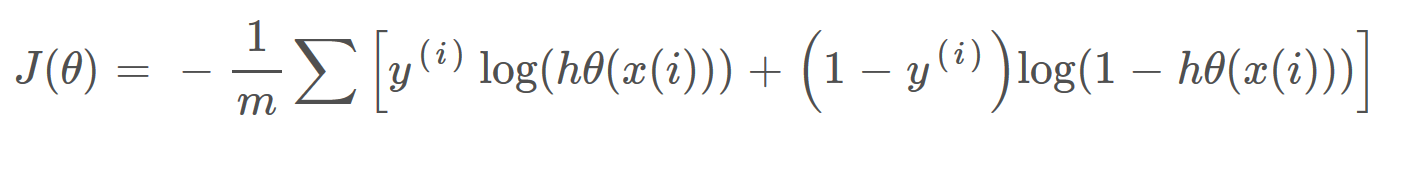

In [0]:
def sigmoid(z):
  return (1/(1 + np.exp(-z)))

In [0]:
def error(a,x,b,y):
  err= 0
  m = len(x)
  for i in range(m):
    f = (a*x[i]) + b
    err+= -y[i]*np.log(sigmoid(f)) - (1-y[i]) *np.log(1 -sigmoid(f))

  return err/m

In [0]:
def step_gradient(a,x,b,y,learning_rate):
  grad_a=0
  grad_b=0
 
  m = len(y)
  for i in range(m):
    f = (a*x[i]) + b
    grad_a+= (sigmoid(f)-y[i])*x[i]
    grad_b+= (sigmoid(f)-y[i])
    

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
 

  return a,b

In [0]:
def descend(init_a, x, init_b,  y, learning_rate, iterations):
  a,b = init_a, init_b
  for i in range(iterations):
    e =error(a,x,b,y)
    if i % 1000 == 0:
      print("Error: %.5f || a: %.5f || b: %.5f "%(e,a,b))
    a,b = step_gradient(a,x,b,y,learning_rate)

  return a,b

In [6]:
from google.colab import files
uploaded = files.upload()

Saving datatraining.txt to datatraining.txt


In [0]:
train_data = pd.read_csv(io.StringIO(uploaded['datatraining.txt'].decode('utf-8')))

In [8]:
uploaded_test = files.upload()

Saving datatest.txt to datatest.txt


In [0]:
test_data1 = pd.read_csv(io.StringIO(uploaded_test['datatest.txt'].decode('utf-8')))

In [10]:
uploaded_test2 = files.upload()

Saving datatest2.txt to datatest2.txt


In [0]:
test_data2 = pd.read_csv(io.StringIO(uploaded_test2['datatest2.txt'].decode('utf-8')))

In [14]:
corrdf = train_data.corr('pearson')
corrdf['Occupancy'].sort_values()

Humidity         0.132964
HumidityRatio    0.300282
Temperature      0.538220
CO2              0.712235
Light            0.907352
Occupancy        1.000000
Name: Occupancy, dtype: float64

In [0]:
features = np.array(train_data[['Light']])
target = np.array(train_data[['Occupancy']])

# Feature Scaling using MinMaxScaler to Normalize all data points
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
# target= scaler.fit_transform(target)

In [0]:
features_test1 = test_data1[['Light']]
target_test1 = test_data1[['Occupancy']]

scaler = MinMaxScaler()
features_test1 = scaler.fit_transform(features_test1)
target_test1 = scaler.fit_transform(target_test1)

In [0]:
features_test2 = test_data2[['Light']]
target_test2 = test_data2[['Occupancy']]

scaler = MinMaxScaler()
features_test2 = scaler.fit_transform(features_test2)
target_test2 = scaler.fit_transform(target_test2)

In [0]:
x = features
y = target

Text(0, 0.5, 'Occupancy')

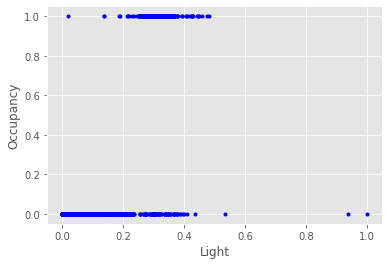

In [14]:
plt.plot(x,y,'b.')
plt.xlabel('Light')
plt.ylabel('Occupancy')

In [15]:
a = 1
b = 1

learning_rate = 0.001
iterations = 5000

fa,fb= descend(a, x, b, y, learning_rate, iterations)

Error: 1.09634 || a: 1.00000 || b: 1.00000 
Error: 0.08103 || a: 29.51169 || b: -6.48475 
Error: 0.07921 || a: 33.13723 || b: -7.41265 
Error: 0.07876 || a: 34.97884 || b: -7.89144 
Error: 0.07859 || a: 36.07871 || b: -8.17904 


(0.0, 1.0)

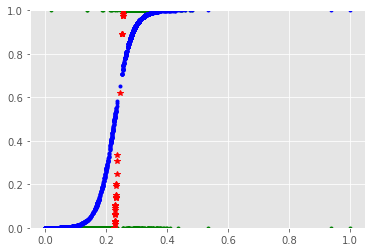

In [16]:
f = fa*x + fb
plt.plot(x, y, 'g.',
         x, sigmoid(f), 'b.',
         x, f, 'r*')
plt.ylim(0,1)

The sigmoid curve fits quite well after training

In [0]:
def accuracy(a,x,b,y):
  correct = 0
  for i in range(len(y)):
    f = (a*x[i]) + b
    prediction = sigmoid(f)
    if prediction > 0.4:
      z = 1
    else:
      z = 0
    if y[i]==z:
      correct+=1

  print("Accuracy: {}".format(correct/len(y)))

In [18]:
accuracy(fa, x, fb, y)

Accuracy: 0.9787547586884441


In [21]:
accuracy(fa, features_test1, fb,  target_test1)

Accuracy: 0.9786116322701689


In [22]:
accuracy(fa, features_test2, fb,  target_test2)

Accuracy: 0.9914889253486464


After training with one feature, the accuracies are as follows:
- Accuracy of train_data : 97.87%
- Accuracy of test_data1 : 97.86%
- Accuracy of test_data2 : 99.14%